*Dataset credit: Troels C. Petersen (NBI, KU))*

# Decission trees hand-in

Import libraries and functions

In [1]:
import sys
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

from sklearn.model_selection import validation_curve
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, GridSearchCV
from matplotlib.colors import ListedColormap

Load dataset

In [2]:
dataset_path = 'Data/Aleph_dataset.csv'
data = pd.read_csv(dataset_path, index_col = 0)

data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel,isb
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003,0.0
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003,0.0
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003,0.0
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240,0.0
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003,1.0


## Classification task

Train a tree classifier to classify the results from electron-positron collisions into b-quarks and non b-quarks —don’t panic if you don’t know what this means, just think of two categories 0 and 1. In other words, train a decision tree that acts as function mapping a set of input features X to an output Y which represents a binary category.

The column *isb* is the category we want to predict: 0 if it's not a b-quark and 1 if it is a b-quark. Therefore we need to split the loaded data into the rest of feature variables and that column.

In [3]:
feature_columns = data.columns
input_variables = data.columns[feature_columns != 'isb']
input_data      = data[input_variables]
truth           = data['isb']
print(input_variables)

Index(['energy', 'cTheta', 'phi', 'prob_b', 'spheri', 'pt2rel', 'multip',
       'bqvjet', 'ptlrel'],
      dtype='object')


Let's check the data that we are going to feed the tree model to predict the categories:

In [4]:
input_data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003


Let us now divide the truth and input_data into two parts; a training sample and a validation sample:

In [5]:
input_train, input_validation, truth_train, truth_validation = train_test_split(input_data, truth, test_size=0.2)

### Hand-in tasks:

1. Define a model `DecisionTreeClassifier`
2. Fit it the data
3. For the trained model, print the model prediction score on the validation split 
4. Display importance of each input feature to the predictions using `feature_importances_`  attribute
5. Plot the decission surface over the top two features
6. Generate the confusion matrix, ROC curve and AUC value of the trained model using `sklearn.metrics.confusion_matrix`, `sklearn.metrics.roc_curve` and `sklearn.metrics.auc`
7. Try to improve the performance of the model by choosing differnt model parameters.
8. *Bonus* : Explore how the model parameters `max_depth`  and `min_samples_leaf` affects the overfitting of the model.
9. *Bonus* : Display the decision `tree.plot_tree(model, max_depth=2)` up to sensible depth and inspect it

In [6]:
# 1. Define model
model = DecisionTreeClassifier()

# 2. Fit model to data
model.fit(input_train, truth_train)

# 3. Print prediction score on validation split
validation_score = model.score(input_validation, truth_validation)
print("Prediction Score on the Validation Set:", validation_score)

Prediction Score on the Validation Set: 0.8467765675596114


In [7]:
# 4. Importance of input features
feature_importance = model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(input_variables, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
energy: 0.0659283922868351
cTheta: 0.06290447952237421
phi: 0.04888009049387543
prob_b: 0.4961052301519742
spheri: 0.0653787769047225
pt2rel: 0.059126083227223486
multip: 0.05418842273782812
bqvjet: 0.1072936386892421
ptlrel: 0.04019488598592488


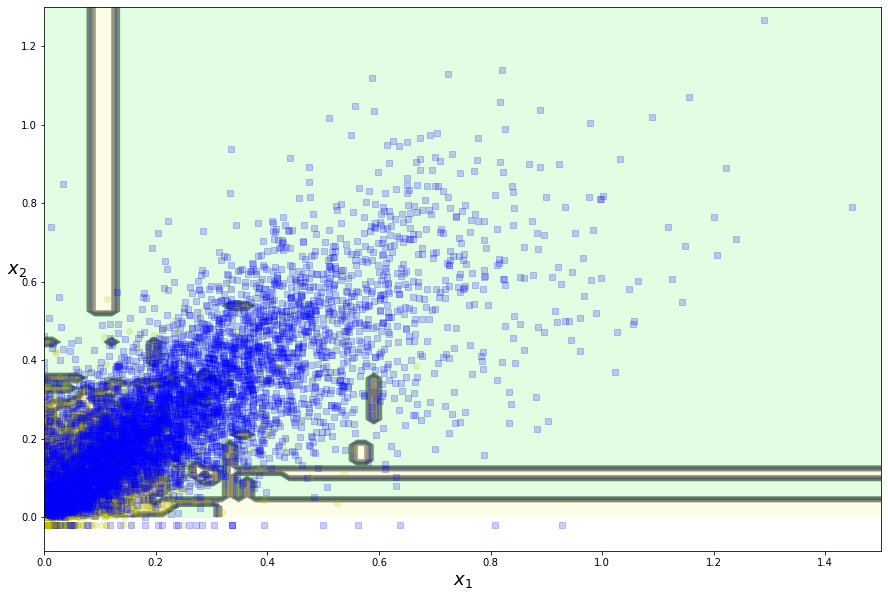

In [8]:
# 5. Plot the decission surface over the top two features
def plot_decision_boundary(clf, X, y, axes=[0, 1.5, 0, 1.3], alpha=0.5, contour=True, figsize=(15, 10)):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = pd.DataFrame(np.c_[x1.ravel(), x2.ravel()], columns=X.columns)
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.figure(figsize=figsize)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], "yo", alpha=alpha)
    plt.plot(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], "bs", alpha=alpha)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.show()

    
# Selecting the top two features
X = input_train[["prob_b", "bqvjet"]]

# Create instance & fit with top 2 features
model2 = DecisionTreeClassifier().fit(X, truth_train)
plot_decision_boundary(model2, X, truth_train,alpha=0.2)

Confusion Matrix:
[[4730  512]
 [ 529 1023]]


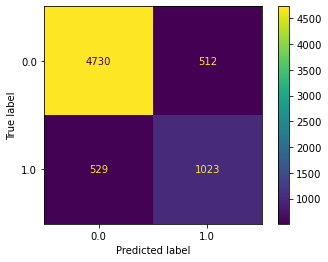

In [9]:
# 6. Confusion Matrix with sklearn.metrics.confusion_matrix`

# Make predictions on the validation data
predictions = model.predict(input_validation)

# Confusion Matrix
conf_matrix = confusion_matrix(truth_validation, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Create confusion matrix plot
ConfusionMatrixDisplay.from_predictions(truth_validation, predictions)

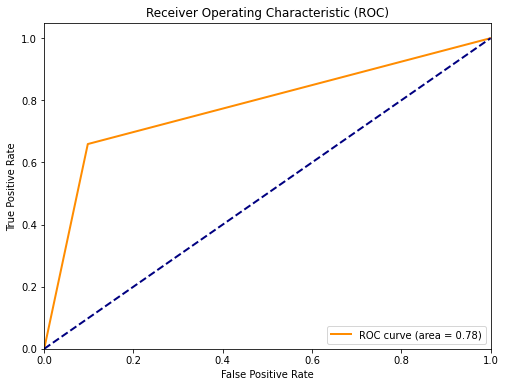

In [10]:
# 6. ROC Curve with `sklearn.metrics.roc_curve`
fpr, tpr, thresholds = roc_curve(truth_validation, model.predict_proba(input_validation)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [11]:
# 6. Display the AUC value with `sklearn.metrics.auc`
print("AUC Value:", roc_auc)

AUC Value: 0.780738420253543


In [12]:
# 7. Hyperparameter Finetuning

# parameters to search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 2, 4, 6, 8, 10], 
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# grid to search object
model3 = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid, 
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit models to data
model3.fit(input_train, truth_train)

# Print the best parameters and best score
print("Best Parameters: ", model3.best_params_)
print("Best Score: ", model3.best_score_)

# Print prediction score on validation split
validation_score3 = model3.best_estimator_.score(input_validation, truth_validation)
print(f"Prediction score on the validation split of teh Finetuned Model:\n {validation_score3}\n")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score:  0.8935378764459285
Prediction score on the validation split of teh Finetuned Model:
 0.8928466293788637



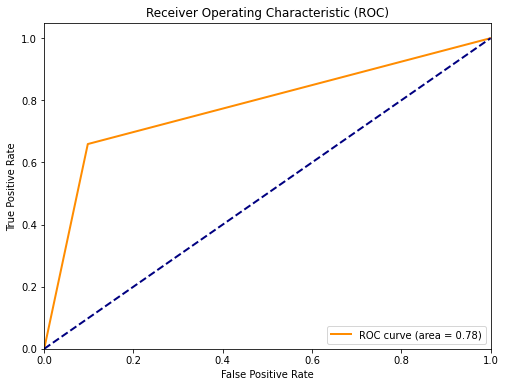

AUC Value: 0.899565907008028


In [13]:
fpr3, tpr3, thresholds3 = roc_curve(truth_validation, model3.predict_proba(input_validation)[:, 1])
roc_auc3 = auc(fpr3, tpr3)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("AUC Value:", roc_auc3)

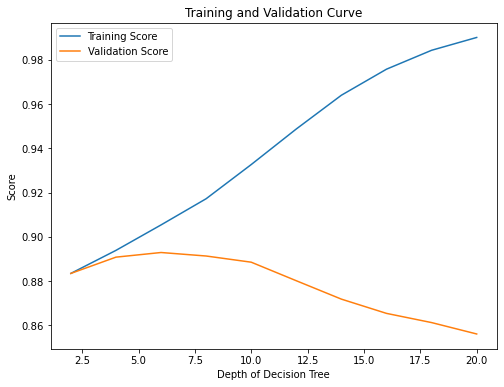

In [14]:
# 8. Overfitting: Explore the model parameters 

# Step 1: max_depth
# Define the range of values for max_depth
param_range = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Calculate training and validation scores using validation_curve
train_scores, valid_scores = validation_curve(
    DecisionTreeClassifier(),
    input_train,
    truth_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5
)

# Plot the validation curves
plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Validation Score")
plt.xlabel("Depth of Decision Tree")
plt.ylabel("Score")
plt.title("Training and Validation Curve")
plt.legend(loc="best")
plt.show()

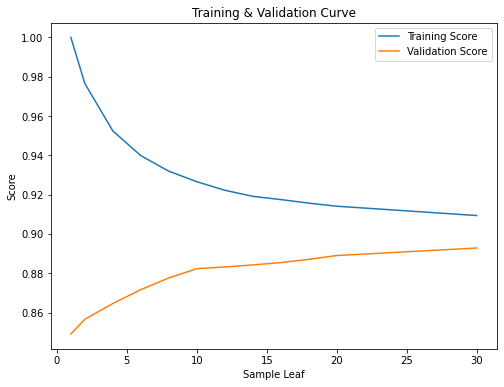

In [15]:
# Step 2: min_samples_leaf
param_range = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30]

# Calculate training and validation scores using validation_curve
train_scores, valid_scores = validation_curve(
    DecisionTreeClassifier(),
    input_train,
    truth_train,
    param_name="min_samples_leaf",
    param_range=param_range,
    cv=5
)

# Plot the validation curves
plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Validation Score")
plt.xlabel("Sample Leaf")
plt.ylabel("Score")
plt.title("Training & Validation Curve")
plt.legend(loc="best")
plt.show()

**Findings**

max_depth:
* A deeper tree can capture more complex patterns. Therefore, better performance can be yielded on the training data.
* However, a larger max_depth can also lead to overfitting, which can be seen as the gap between the training and validation accuracy is large and increases with depth.
* The training accuracy constantly increases with more depth.
* The validation accuracy first increases approximately until a depth of 6 and then decreases.

min_samples_leaf:
* On the contrary, smaller minimum samples per leaf lead to more overfitting because a small value leads to a tree that has leaves with only a few samples.
* The training and validation accuracy get closer together with increasing samples per leaf. However, the training accuracy is better for larger sample leaf values.
* A value between 8 and 14 could be optimal.

In [16]:
# Step 3: Create model
model4 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=15)

# Fit model to data
model4.fit(input_train, truth_train)

# Print prediction score on validation split
validation_score4 = model4.score(input_validation, truth_validation)
print("Prediction score on the validation split of second finetuned model:", validation_score4)

Prediction score on the validation split of second finetuned model: 0.8869590815425376


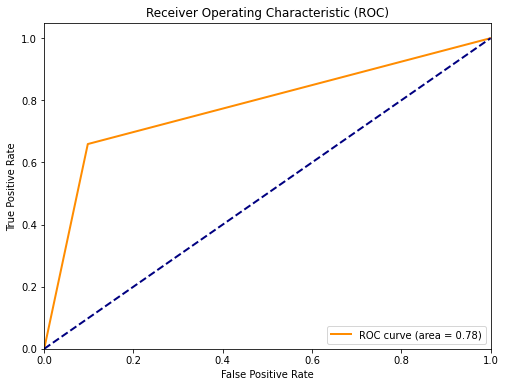

AUC Value: 0.8792248964548828


In [17]:
fpr4, tpr4, thresholds4 = roc_curve(truth_validation, model4.predict_proba(input_validation)[:, 1])
roc_auc4 = auc(fpr4, tpr4)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("AUC Value:", roc_auc4)

In [18]:
print("\033[1mComparison of Prediction Score on validation set of Models\033[0m")
print("basic model:", validation_score)
print("first finetuned model", validation_score3)
print("second finetuned model:", validation_score4)

print("\n\033[1mComparison of AUC Score of Models\033[0m")
print("basic model:", roc_auc)
print("first finetuned model", roc_auc3)
print("second finetuned model:", roc_auc4)

Comparison of Prediction Score on validation set of Models
basic model: 0.8467765675596114
first finetuned model 0.8928466293788637
second finetuned model: 0.8869590815425376

Comparison of AUC Score of Models
basic model: 0.780738420253543
first finetuned model 0.899565907008028
second finetuned model: 0.8792248964548828


**Findings**

* The first fine-tuned model has the largest Prediction Score on the Validation Set and highest AUC Score.
* This can be explained by the Grid Search approach that looks at different hyperparameter combinations at the same time and selects the combination with the best model performance.

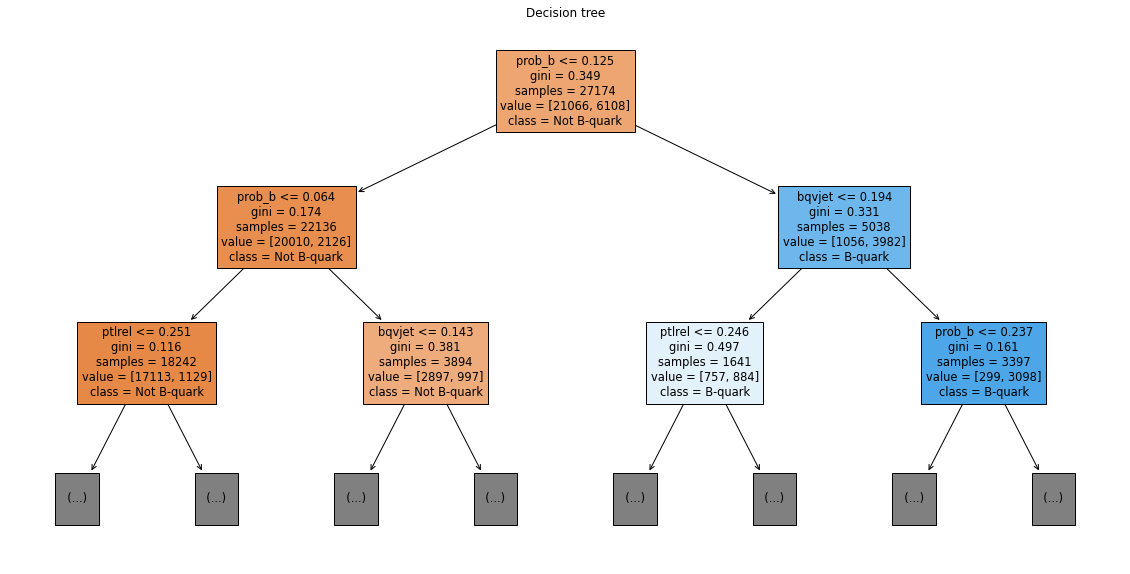

In [19]:
# 9. Display the decision tree.plot_tree(model, max_depth=2) up to a sensible depth

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, max_depth=2, feature_names=input_variables.tolist(), class_names=['Not B-quark', 'B-quark'])
plt.title("Decision tree")
plt.show()

**Findings**

* The visualization shows that prob_b and bqvjet are the best features to split the data. Thus, those features cause the first split as they can sepearte the data in the best way.
* prob_b is the most important feature with a gini coefficient of 0.174

## Regression task

The goal of the regression task is to predict the energy of each particles collision based on the variables.

### Hand-in tasks:

1. Define a regression tree model using `DecisionTreeRegressor` and fit it to predict the energy of the collions
3. For the trained model, visualise the model predictions vs the real values and print the obtained loss
4. Report importance of each feature using `feature_importances_`  attribute  
5. Evaluate your model on the training split and figure out what depths the tree need to perfectly predict the training data split.
6. Try to improve the performance of the model on the validation split by choosing different model parameters (if you're familiar with it, feel free to use k-fold Cross-Validation)
7. *Bonus*: Predict two any features —e.g. energy and another one— based on the rest. [Here you can find an example of Multi-output ree regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py).

In [20]:
# create variables
feature_columns = data.columns
input_variables2 = data.columns[feature_columns !='energy']
input_variables2 = input_variables2[input_variables2 != 'isb']

input_data2 = data[input_variables2]
truth2 = data['energy']

input_train2, input_validation2, truth_train2, truth_validation2 = train_test_split(input_data2, truth2, test_size=0.2)

input_data2

,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel
0,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003
1,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003
2,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003
3,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240
4,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003
...,...,...,...,...,...,...,...,...
33963,-0.2944,3.0779,0.0273,0.2619,0.0370,0.4729,0.0203,-0.0003
33964,-0.6435,-0.3996,0.0153,0.1120,0.0738,0.2943,0.0767,-0.0003
33965,0.6304,2.7350,0.1191,0.2643,0.0192,0.0436,0.0301,-0.0003
33966,0.0718,-2.0928,0.1928,0.7044,0.1263,0.6126,0.6859,-0.0003


In [21]:
# 1. Define the model
regression_model = DecisionTreeRegressor(random_state = 42)
# Fit the model to predict energy
regression_model.fit(input_train2, truth_train2)

DecisionTreeRegressor(random_state=42)

Mean Squared Error: 47.37143052914189


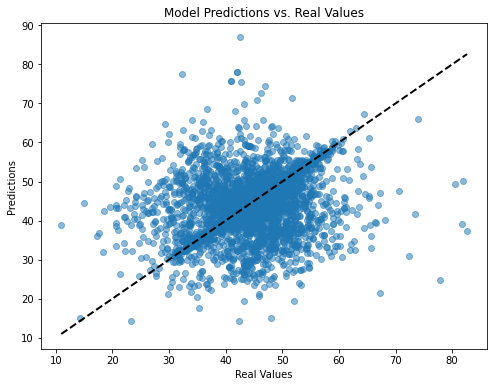

In [22]:
# 2. Visualization of model prediction vs real values & loss

# Get the model's predictions for the training set
predictions_train = regression_model.predict(input_validation2)

# Calculate the mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(truth_validation2, predictions_train)
print("Mean Squared Error:", mse)

# Visualize the model predictions vs. the real values
plt.figure(figsize=(8, 6))
plt.scatter(truth_validation2, predictions_train, alpha=0.5)
plt.plot([truth_validation2.min(), truth_validation2.max()], [truth_validation2.min(), truth_validation2.max()], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Model Predictions vs. Real Values")
plt.show()

In [23]:
# 3. Importance of the features
feature_importance_regression = regression_model.feature_importances_
print("Feature Importance for Regression:")
for feature, importance in zip(input_variables2, feature_importance_regression):
    print(f"{feature}: {importance}")

Feature Importance for Regression:
cTheta: 0.07764908389108467
phi: 0.06253737945616149
prob_b: 0.07797031124865961
spheri: 0.076122906538105
pt2rel: 0.14135134305411828
multip: 0.4142878678160412
bqvjet: 0.06939407744457217
ptlrel: 0.08068703055125757


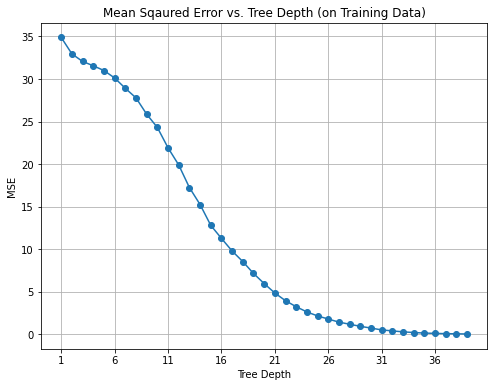

In [24]:
# 4. Evaluate model & decide depth: Training Data
# Fit the model for different depths
train_scores = []
depths = range(1, 40)

mse_list = []
for depth in depths:
    model = DecisionTreeRegressor(random_state=42, max_depth=depth)
    model.fit(input_train2, truth_train2)
    y_pred = model.predict(input_train2)
    mse = mean_squared_error(truth_train2, y_pred)
    mse_list.append(mse)

# Plot the training score vs. depth
plt.figure(figsize=(8, 6))
plt.plot(depths, mse_list, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("MSE")
plt.title("Mean Sqaured Error vs. Tree Depth (on Training Data)")
plt.xticks(np.arange(1, 40, 5))
plt.grid(True)
plt.show()

**Result**
* A higher tree depth leads to a lower MSE and therebey better performance of th model.
* However, approx. at a depth of 31 the MSE reaches 0 and thus does not decrease MSE further.
* It has to be noted that this is just based on the training data. The validation data should be taken into account to not cause overfitting.

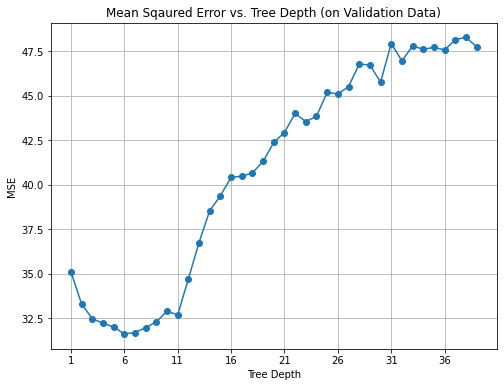

In [25]:
# 4. Evaluate model & decide depth: Validation Data
# Fit the model for different depths
depths = range(1, 40)

mse_list = []

for depth in depths:
    model = DecisionTreeRegressor(random_state=42, max_depth=depth)
    model.fit(input_train2, truth_train2)
    y_pred = model.predict(input_validation2)
    mse = mean_squared_error(truth_validation2, y_pred)
    mse_list.append(mse)

# Plot the training score vs. depth
plt.figure(figsize=(8, 6))
plt.plot(depths, mse_list, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("MSE")
plt.title("Mean Sqaured Error vs. Tree Depth (on Validation Data)")
plt.xticks(np.arange(1, 40, 5))
plt.grid(True)
plt.show()

**Finding**
* The described overfitting gets confirmed by evaluating the MSE on the validation score: While the score decreases at first, it increases constantly after a threshold.
* To perfectly predict the validation data a depth of 5 would be necessary.
* Thus, while the MSE score on the training data still decreases from a tree depth of larger than 6, the MSE on the validation data does not.

In [26]:
# 5. Hyperparameter Finetuning

regression_model2 = DecisionTreeRegressor(random_state = 42) # create model

# 5 fold cross-validation with GridSearch to tune hyperparameters
param_grid = {
    'max_depth': list(range(1,20)),  # Different maximum depth values to try
    'min_samples_split': [2, 10, 20, 30, 40],  # Different minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 8, 10]  # Different minimum samples required to be a leaf node
}

# Initialize the GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(regression_model2, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(input_train2, truth_train2)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Retrain the model with the best hyperparameters
best_regression_model = DecisionTreeRegressor(**best_params)
best_regression_model.fit(input_train2, truth_train2)

# Evaluate the model on the validation set
validation_predictions = best_regression_model.predict(input_validation2)

# Get MSE as a performance metric
mse2 = mean_squared_error(truth_validation2, validation_predictions)
print("Mean Squared Error on Validation Set:", mse2)

Best hyperparameters: {'max_depth': 19, 'min_samples_leaf': 10, 'min_samples_split': 40}
Mean Squared Error on Validation Set: 27.957992063403307


In [27]:
print("\033[1mComparison of MSE Score on Validation Data\033[0m")
print("basic model:", mse)
print("finetuned model", mse2)

Comparison of MSE Score on Validation Data
basic model: 47.75800219026994
finetuned model 27.957992063403307


**Findings**

* The fine-tuned model has the higher MSE Score and is thus the better model.
* This is the result due to the finetuning using cross validation. Therebey, different hyperparameters get tested and the best combination is choosen.

In [28]:
# 6. Predict two any features —e.g. energy and another one— based on the rest

# Create data splits with relevant features
input_train3 = input_train.drop(columns=['energy', 'phi'])
truth_train3 = input_train[['energy', 'phi']]

input_validation3 = input_validation.drop(columns=['energy', 'phi'])
truth_validation3 = input_validation[['energy', 'phi']]

# Import
from sklearn.multioutput import MultiOutputRegressor

# Create model
model = DecisionTreeRegressor() # Define the model
wrapper = MultiOutputRegressor(model) # define the direct multioutput wrapper model

wrapper.fit(input_train3, truth_train3) # Fit the model

y_pred = wrapper.predict(input_validation3)

# Calculate MSE
mse3 = mean_squared_error(truth_validation3, y_pred)
print(f"Mean Squared Error: {mse3}")

Mean Squared Error: 26.169254294980128
